<a href="https://colab.research.google.com/github/praaatik/pytorch/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.1+cu118'

# Creating some data to play around with


In [3]:
print(torch.tensor(0.7).shape)
print(torch.arange(0, 1, 0.02).shape)
print(torch.arange(0, 1, 0.02).unsqueeze(dim = 1).shape)

torch.Size([])
torch.Size([50])
torch.Size([50, 1])


In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

## Reason for using the `unsqueeze` function

The weight tensor is a scalar `(0.7)`, and PyTorch expects tensors to be broadcastable when performing operations like multiplication. Broadcasting allows operations between tensors of different shapes, but they need to have compatible dimensions. In this case, `X` has a shape of `(49,)` and weight has a shape of `()`. To make the multiplication possible, shapes need to align. By using `.unsqueeze(dim=1)`, you effectively reshape `X` to `(49, 1)` so that it can be element-wise multiplied with the scalar weight.

In [5]:
print(X[:10], y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [6]:
print(torch.arange(start, end, step).ndim)
print(torch.arange(start, end, step).unsqueeze(dim = -1).ndim)
print(torch.arange(start, end, step).unsqueeze(dim = -2).ndim)
print(torch.arange(start, end, step).unsqueeze(dim = 0).ndim)
print(torch.arange(start, end, step).unsqueeze(dim = 1).ndim)

1
2
2
2
2


In [7]:
torch.arange(start, end, step).shape

torch.Size([50])

In [8]:
torch.arange(start, end, step).unsqueeze(dim = 0).shape

torch.Size([1, 50])

In [9]:
torch.arange(start, end, step).unsqueeze(dim = 1).shape

torch.Size([50, 1])

In [10]:
torch.arange(start, end, step).unsqueeze(dim = -1).shape

torch.Size([50, 1])

In [11]:
torch.arange(start, end, step).unsqueeze(dim = -2).shape

torch.Size([1, 50])

In [12]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test, predictions = None):
  plt.xkcd()
  plt.figure(figsize=(10, 6))

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
  plt.legend(prop = {"size": 14})


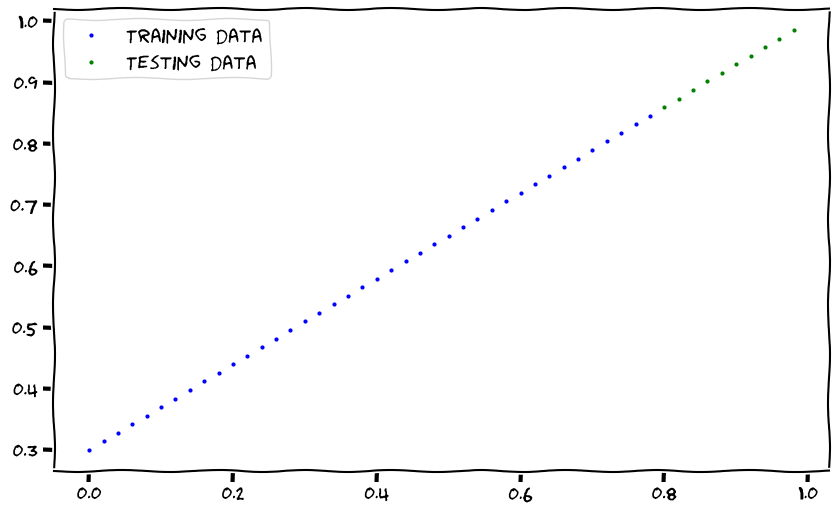

In [14]:
plot_predictions()

In [15]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [16]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [18]:
model_0.__dict__

{'training': True,
 '_parameters': OrderedDict([('weights',
               Parameter containing:
               tensor([0.3367], requires_grad=True)),
              ('bias',
               Parameter containing:
               tensor([0.1288], requires_grad=True))]),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict()}

In [19]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [20]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


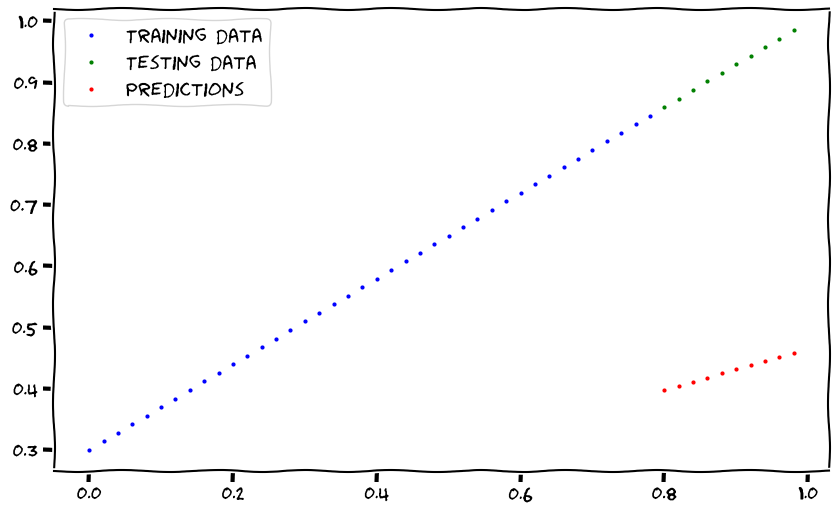

In [21]:
plot_predictions(predictions=y_preds)

Creating the loss function and optimizer

In [22]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

## Training Loop
> Happens in `train()` mode
- Forward pass
- Calculate the loss
- Zero gradients
- Perform backpropagation on the loss
- Update the optimizer

## Testing Loop
> Happens in `eval()` mode
- Forward pass
- Calculate the loss
- Calculate evaluation metrics


In [23]:
torch.manual_seed(42)

epochs = 300

train_loss_values = list()
test_loss_values = list()
epoch_count = list()

for epoch in range(epochs):
  ## training
  model_0.train()

  # below calls the forward() of the model
  y_pred = model_0(X_train)

  # calculate the loss
  loss = loss_function(y_pred, y_train)

  # zero grad of the optimizer
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## testing
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_function(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

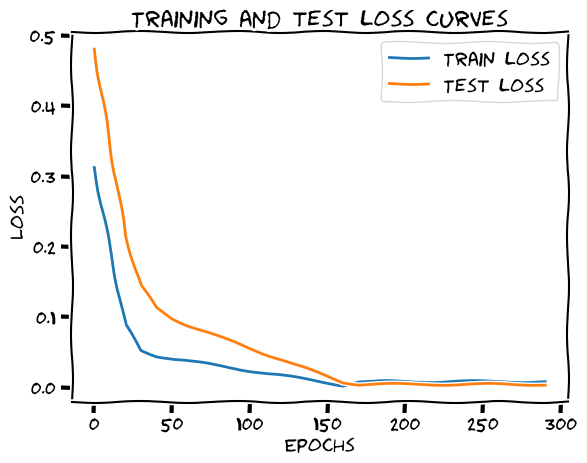

In [24]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [25]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Making a few predictions

> To check if the model is currently in a training or testing mode, just use the `model.training` parameter.

In [29]:
model_0.train()
print(model_0.training)

model_0.eval()
print(model_0.training)

True
False


In [30]:
with torch.inference_mode():
  y_predictions = model_0(X_test)
print(y_predictions)

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


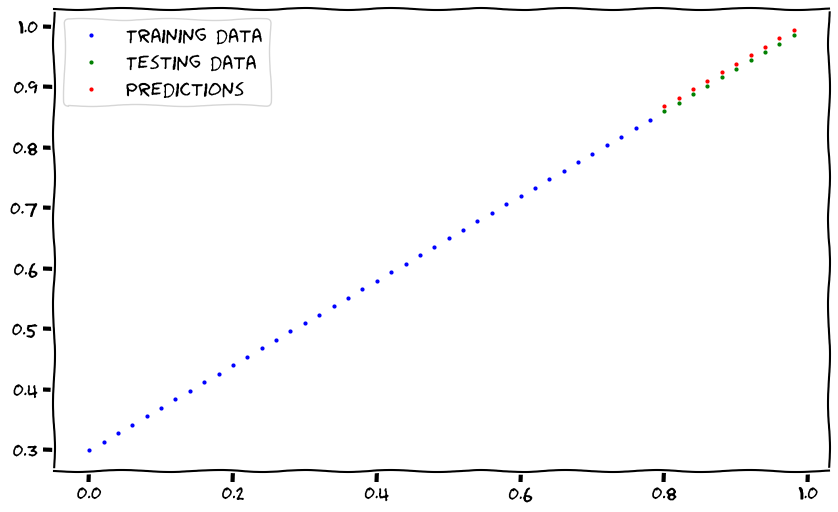

In [31]:
plot_predictions(predictions=y_predictions)